# Import

In [1]:
import csv
import os
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sps
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from tqdm import tqdm

## Add configuration file

In [2]:
sys.path.append("/home/jovyan/core/config/")

In [3]:
from ALL import config 

## Set condition

In [4]:
tqdm.pandas()
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

# Read data

In [5]:
news_df = pd.read_csv("../../../Preprocessing/data/AgNews/master.csv", index_col=0)

In [6]:
with open("../../../Preprocessing/data/AgNews/class.csv", mode="r") as f:
    reader = csv.reader(f)
    class_labels = [label for label in reader]

In [7]:
vector_dims = config["vectorize"]["doc2vec"]["dims"]
model_nums = config["clustering"]["gmm"]["max_model_num"]
vector_model_num = config["vectorize"]["doc2vec"]["max_model_num"]
covariance_types = config["clustering"]["gmm"]["covariance_types"]

In [8]:
label = news_df["class"].to_numpy()

In [9]:
prob_path = "../../../Clustering/data/AgNews/doc2vec/GMM/prob/"
pred_path  = "../../../Clustering/data/AgNews/doc2vec/GMM/pred/"
dist_path  = "../../../Clustering/data/AgNews/doc2vec/GMM/dist/"
models_path = "../../../Clustering/data/AgNews/doc2vec/GMM/model/"
vectors_path = "../../../Clustering/data/AgNews/doc2vec/vector/"

for model_num in tqdm(range(model_nums)):
    for vector_dim in vector_dims:
        for covariance_type in covariance_types:
            probs = np.load(
                f"{prob_path}{vector_dim}/{covariance_type}/{model_num}.npy",
            )
            pred = np.load(
                f"{prob_path}{vector_dim}/{covariance_type}/{model_num}.npy",
            )
            dist = np.load(
                f"{dist_path}{vector_dim}/{covariance_type}/{model_num}.npy",
            )
            gmm = pickle.load(
                open(
                    f"{models_path}{vector_dim}/{covariance_type}/{model_num}.sav", "rb"
                )
            )
            break
        break
    break

  0%|          | 0/30 [00:00<?, ?it/s]


In [10]:
vector_dim = 160
covariance_type = "tied"
model_num = 0

In [11]:
vector_path = f"{vectors_path}{vector_dim}/normalized/{vector_model_num}.csv"
vectors = np.loadtxt(vector_path, delimiter=",")

probs = np.load(
    f"{prob_path}{vector_dim}/{covariance_type}/{model_num}.npy",
)
pred = np.load(
    f"{pred_path}{vector_dim}/{covariance_type}/{model_num}.npy",
)
dist = np.load(
                f"{dist_path}{vector_dim}/{covariance_type}/{model_num}.npy",
            )

gmm = pickle.load(
    open(f"{models_path}{vector_dim}/{covariance_type}/{model_num}.sav", "rb")
)

In [12]:
threshold = 0.01

In [13]:
sps.chi2.ppf(q=0.95, df = vector_dim)

190.5164565139585

In [19]:
news_df[dist.min(axis=1) > sps.chi2.ppf(q=0.95, df=vector_dim)]

,class,title,text,words,words_nonstop
4,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","AFP - Tearaway world oil prices , toppling rec...",AFP Tearaway world oil prices toppling records...
8,Business,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...,Forbes.com - After earning a PH.D. in Sociolog...,Forbes.com earning PH.D. Sociology Danny Bazil...
14,Business,Dollar Falls Broadly on Record Trade Gap,NEW YORK (Reuters) - The dollar tumbled broad...,NEW YORK ( Reuters ) - The dollar tumbled broa...,NEW YORK Reuters dollar tumbled broadly Friday...
39,Business,Microsoft Corp. 2.0: a kinder corporate culture,Even a genius can mess up. Bill Gates was a br...,Even a genius can mess up . Bill Gates was a b...,Even genius mess Bill Gates brilliant technolo...
40,Business,Letters,Target the abusers of legal weapons We can all...,Target the abusers of legal weapons We can all...,Target abusers legal weapons share outrage exp...
...,...,...,...,...,...
119962,Sports,Stokley flourishing with Colts,"He was known as the deceptively fast, glue-fin...","He was known as the deceptively fast , glue-fi...",known deceptively fast glue-fingered wide rece...
119964,Sports,Brazil: Kidnapped footballer #39;s mother freed,"Forty-one days after her dramatic abduction, M...","Forty-one days after her dramatic abduction , ...",Forty-one days dramatic abduction Marina Lima ...
119988,World,Navy to go on PR 'offensive' to repair battere...,Canadian Press - HALIFAX (CP) - They have beco...,Canadian Press - HALIFAX ( CP ) - They have be...,Canadian Press HALIFAX CP become defining imag...
119990,World,Barack Obama Gets #36;1.9 Million Book Deal (AP),"AP - U.S. Sen.-elect Barack Obama, whose 1995 ...","AP - U.S. Sen.-elect Barack Obama , whose 1995...",AP U.S. Sen.-elect Barack Obama whose 1995 boo...


(array([1.0000e+00, 4.0000e+00, 9.0000e+00, 4.3000e+01, 1.1900e+02,
        3.4400e+02, 7.8300e+02, 1.3720e+03, 2.5370e+03, 4.2060e+03,
        6.4440e+03, 8.8260e+03, 1.1307e+04, 1.3160e+04, 1.3763e+04,
        1.3348e+04, 1.1801e+04, 9.8900e+03, 7.4750e+03, 5.2210e+03,
        3.5750e+03, 2.2720e+03, 1.3940e+03, 8.7000e+02, 4.7400e+02,
        2.7200e+02, 1.6900e+02, 1.0900e+02, 6.8000e+01, 4.0000e+01,
        2.8000e+01, 1.2000e+01, 1.1000e+01, 1.4000e+01, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

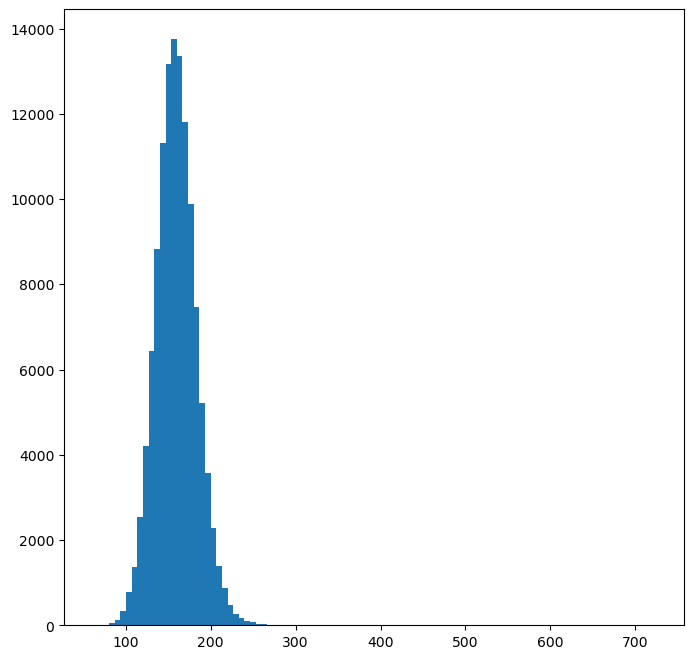

In [20]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.hist(dist.min(axis=1), bins = 100)